# Datan siivoustehtävä datalla Chronid Kidney Disease

### Avataan tarvittavat työskenetelyympäristöt ja tuodaan data dataframe -muotoon käsittelyä varten

In [669]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) # Kiitos, Elina!

In [670]:
# Avaa fileen ja tekee siitä dataframen
# Tämä olisi yksi vaihtoehto
#with open("kd.csv", mode="r") as file: #avaa csv:n nimellä file

    #df = pd.read_csv(file)
    #print(df)

# Tämä toinen
kd = pd.read_csv("kd.csv")
print(kd)


    age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
0    48  80  1.020  1  0       ?    normal  notpresent  notpresent  121  ...   
1     7  50  1.020  4  0       ?    normal  notpresent  notpresent    ?  ...   
2    62  80  1.010  2  3  normal    normal  notpresent  notpresent  423  ...   
3    48  70  1.005  4  0  normal  abnormal     present  notpresent  117  ...   
4    51  80  1.010  2  0  normal    normal  notpresent  notpresent  106  ...   
..   ..  ..    ... .. ..     ...       ...         ...         ...  ...  ...   
395  55  80  1.020  0  0  normal    normal  notpresent  notpresent  140  ...   
396  42  70  1.025  0  0  normal    normal  notpresent  notpresent   75  ...   
397  12  80  1.020  0  0  normal    normal  notpresent  notpresent  100  ...   
398  17  60  1.025  0  0  normal    normal  notpresent  notpresent  114  ...   
399  58  80  1.025  0  0  normal    normal  notpresent  notpresent  131  ...   

    pcv  wbcc rbcc  htn   dm cad appet 

### Tutkitaan dataa, apuna myös https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

In [671]:
# Datan kuvaus ja datatyypit
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [672]:
kd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [673]:
# Kuinka laaja tiedsto riviä, saraketta
kd.shape

(400, 25)

### Kuinka monta erilaista arvoa class-sarakkeessa eli vastemuuttujassa
##### Arvot: ckd = munuaistauti on, notckd = ei tautia ja korjattava virhe ckd\t, jonka korjaan ckd:ksi 

In [674]:
# Kuinka monta erilaista arvoa on class -sarakkeessa eli vastemuuttujassa
kd["class"].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

### Muiden virheiden korjaus
#### Arvojen läpikäyntiä value_counts -funktiolla, jotta ymmärrys arvoista ja niiden esiintymismääristä.
##### Huomioita:
##### 1. ? arvoa on paljon > muutetaan na:ksi 
##### 2. Sen lisäksi jokainen sarake on käytävä lävitse unique -funktiolla, yksittäisten virheellisten arvojen löytämiseksi > replace -funktiolla sopiva korvaava aro
##### Esimerkikkejä korjaamisesta: \tyes > yes, ckd\t > ckd

In [675]:
kd["class"].value_counts()

class
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [676]:
kd["rbc"].value_counts()

rbc
normal      201
?           152
abnormal     47
Name: count, dtype: int64

In [677]:
kd["pc"].value_counts()

pc
normal      259
abnormal     76
?            65
Name: count, dtype: int64

In [678]:
kd["pcc"].value_counts()

pcc
notpresent    354
present        42
?               4
Name: count, dtype: int64

In [679]:
kd["ba"].value_counts()

ba
notpresent    374
present        22
?               4
Name: count, dtype: int64

In [680]:
kd["dm"].value_counts()

dm
no       258
yes      134
\tno       3
\tyes      2
?          2
 yes       1
Name: count, dtype: int64

In [681]:
#korjaa virheelliset merkinnät (unique-replace) - kenttä class, uskoin, että ckd/t tarkoittaa ckd
kd["class"]= kd["class"].replace("ckd\t", "ckd")

In [682]:
kd["class"].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

In [683]:
kd["htn"].unique()
kd["dm"].unique()
kd["cad"].unique()
kd["appet"].unique()
kd["pe"].unique()

array(['no', 'yes', '?'], dtype=object)

In [684]:
kd["pcv"]=kd["pcv"].replace("\t?", "?")
kd["wbcc"]=kd["wbcc"].replace("\t?","?")
kd["rbcc"]=kd["rbcc"].replace("\t?","?")
kd["dm"] = kd["dm"].replace("\tno","no").replace("\tyes", "yes").replace(" yes","yes")
kd["cad"] = kd["cad"].replace("\tno","no")



In [685]:
#print(kd.loc[162])


In [686]:
kd[::] = kd[::].replace("?", np.nan)
print(kd)

    age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
0    48  80  1.020  1  0     NaN    normal  notpresent  notpresent  121  ...   
1     7  50  1.020  4  0     NaN    normal  notpresent  notpresent  NaN  ...   
2    62  80  1.010  2  3  normal    normal  notpresent  notpresent  423  ...   
3    48  70  1.005  4  0  normal  abnormal     present  notpresent  117  ...   
4    51  80  1.010  2  0  normal    normal  notpresent  notpresent  106  ...   
..   ..  ..    ... .. ..     ...       ...         ...         ...  ...  ...   
395  55  80  1.020  0  0  normal    normal  notpresent  notpresent  140  ...   
396  42  70  1.025  0  0  normal    normal  notpresent  notpresent   75  ...   
397  12  80  1.020  0  0  normal    normal  notpresent  notpresent  100  ...   
398  17  60  1.025  0  0  normal    normal  notpresent  notpresent  114  ...   
399  58  80  1.025  0  0  normal    normal  notpresent  notpresent  131  ...   

    pcv  wbcc rbcc  htn   dm cad appet 

### Kaikki muuttuja olivat datatyyppiä object, joka ei sovi analysointii
##### 1. Kaikki integer-tyyppiset muuttuja muutetaan objekteista floateiksi
##### 2. Kaikki 'binary', 'categorical' ja 'continuous' -muuttuja muutetaan objekteista jatkuviksi (0,1,2 jne) ja siten floateiksi.


In [687]:
# Sarakkeiden operointi yksi kerrallaan....
kd["age"] = pd.to_numeric(kd["age"])  # integer, age (year)
kd["bp"] = pd.to_numeric(kd["bp"])  # integer, blood pressure (mm/Hg)
kd["sg"] = pd.to_numeric(kd["sg"])  # categorical, specific gravity
kd["al"] = pd.to_numeric(kd["al"])  # categorical, albumin
kd["su"] = pd.to_numeric(kd["su"]) # categorical, sugar
kd["rbc"]= kd["rbc"].replace({"normal": 0,"abnormal": 1}) # binary, red blood cells
kd["pc"] = kd["pc"].replace({"normal": 0,"abnormal": 1}) # binary, pus cell
kd["pcc"] =kd["pcc"].replace({"notpresent": 0,"present": 1}) # binary, pus cell pumps
kd["ba"] =kd["ba"].replace({"notpresent": 0,"present": 1}) # binary,bacteria
kd["bgr"] = pd.to_numeric(kd["bgr"]) # integer, blood glucose random (mgs/dl)
kd["bu"] = pd.to_numeric(kd["bu"]) # integer, blood urea (mgs/dl)
kd["sc"] = pd.to_numeric(kd["sc"]) # continuous, serum creatine (mEq/L)
kd["sod"] = pd.to_numeric(kd["sod"])  # integer, sodium (mEq/L)
kd["pot"] = pd.to_numeric(kd["pot"]) # continuous, potassium (mEq/L)
kd["hemo"] = pd.to_numeric(kd["hemo"]) # continuous, hemoglobin (mEq/L)
kd["pcv"] = pd.to_numeric(kd["pcv"])  # integer, packed cell volume (cells/cmm)
kd["wbcc"] = pd.to_numeric(kd["wbcc"])  # integer, white blood cell count (cells/cmm)
kd["rbcc"] = pd.to_numeric(kd["rbcc"])  # integer, red blood cell count (millions/cmm)
kd["htn"] =kd["htn"].replace({"no": 0,"yes": 1}) # binary, hypertension
kd["dm"] =kd["dm"].replace({"no": 0,"yes": 1}) # binary, diabetes
kd["cad"] =kd["cad"].replace({"no": 0,"yes": 1}) # binary, coronary artery disease
kd["appet"] =kd["appet"].replace({"good": 0,"poor": 1}) # binary, coronary artery disease
kd["pe"] =kd["pe"].replace({"no": 0,"yes": 1}) # binary, cpedal edema
kd["ane"] =kd["ane"].replace({"no": 0,"yes": 1}) # binary, anemia
kd["class"] =kd["class"].replace({"notckd": 0,"ckd": 1}) # binary, anemia

kd["al"] = pd.to_numeric(kd["al"])  # categorical, albumin


kd.dtypes


age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class      int64
dtype: object

### Duplikaatit ja tyhjät arvot
##### Datassa ei ole tietoja, jonka perusteella voisi arvioida rivin olevan duplikaatti
##### Datassa on paljon tyhjiä soluja. Kaikilla on kuitenkin vastemuuttujan lisäksi vähintään yksi muu muuttuja, jolla arvo.

In [688]:
kd.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [689]:
empty_cells = kd.isnull()
empty_cells.value_counts()

age    bp     sg     al     su     rbc    pc     pcc    ba     bgr    bu     sc     sod    pot    hemo   pcv    wbcc   rbcc   htn    dm     cad    appet  pe     ane    class
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    158
                                   True   False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False     31
                                   False  False  False  False  False  False  False  False  False  True   True   True   True   False  False  False  False  False  False  False     11
                                                                                    True   True   False  False  False  False  False  False  False  False  False  False  False     10
                                   True   False  False  False  False  False  False  True   True   Fals

In [690]:
empty_rows = kd.isnull().any(axis=1)
empty_rows.value_counts()


True     242
False    158
Name: count, dtype: int64

In [691]:
# Varmistus, että ei ole yhtään sellaista riviä, jolla olisi vain arvo vastemuuttujassa (ainoa, jossa kaikilla on muuttja-arvo)
one_value_rows = kd[kd.notnull().sum(axis=1) == 1]
one_value_rows.value_counts()


Series([], Name: count, dtype: int64)

## Visualisointi ja analyysi sen perusteella

Text(0.5, 1.0, 'Munuaissairauden esiintyminen, 1= positiivinen')

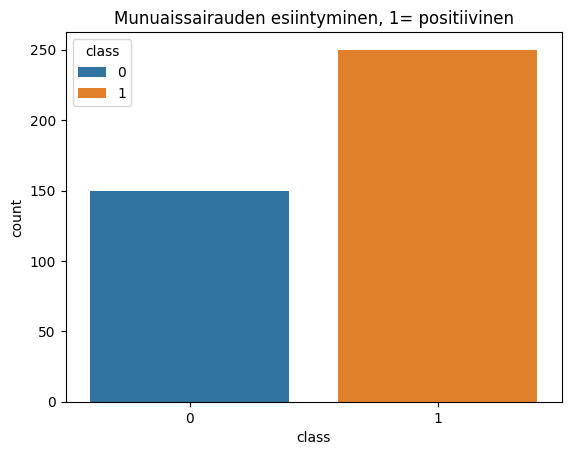

In [692]:
# Munuaistauti - sairastuminen, määrät

sns.countplot(data=kd, x='class', hue='class')
plt.title('Munuaissairauden esiintyminen, 1= positiivinen')

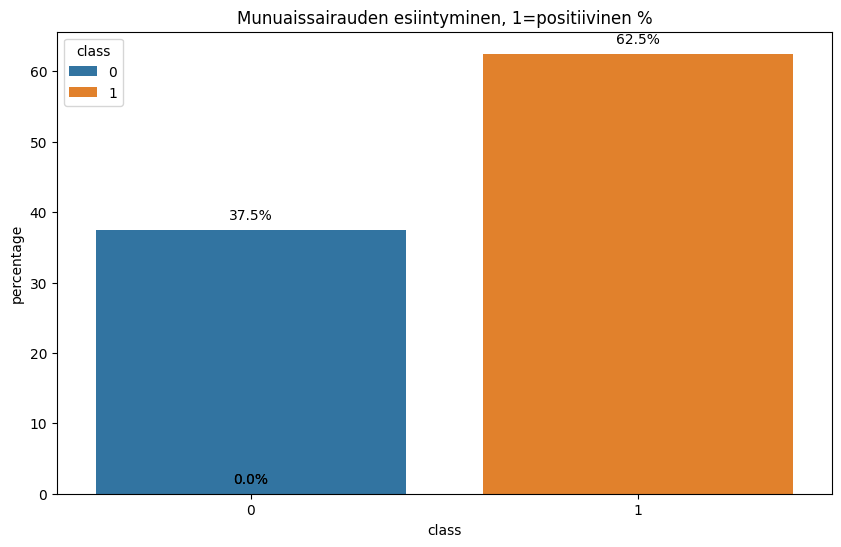

In [693]:
# Kuinka monella on positiivinen tulos eli munuaistauti ja kuinka monella ei?
# Calculate the percentage of alive/not alive
kd["percentage"] = kd.groupby("class")["class"].transform("count") / len(kd) * 100

# Plotting
sns.color_palette("bright")
plt.figure(figsize=(10, 6))
#ax = sns.barplot(data=titanic.drop_duplicates("alive"), x='alive', y='percentage')
ax = sns.barplot(data=kd, x='class', y='percentage', hue="class")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Munuaissairauden esiintyminen, 1=positiivinen %")
plt.show()

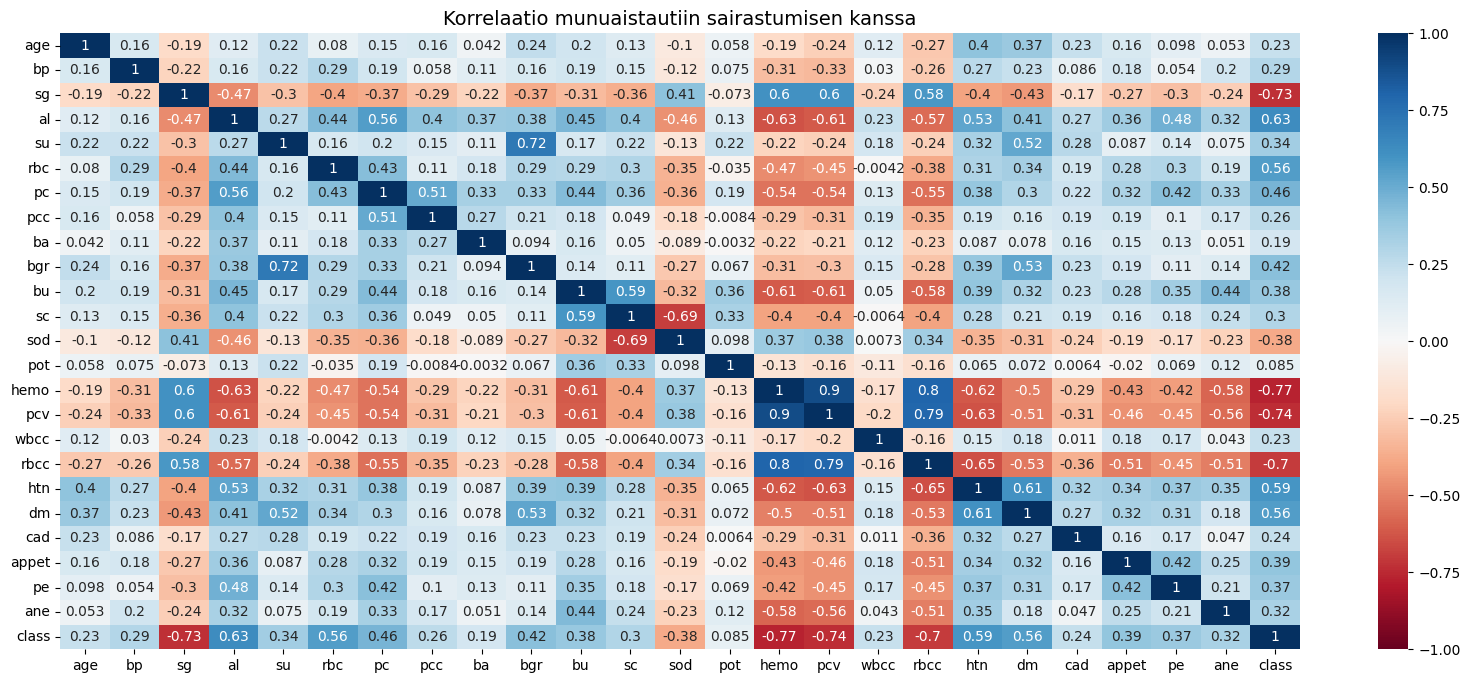

In [694]:
# Korrelaatiotaulun tekeminen
# Otetaan vain numeeriset arvot
numeric_kd = kd.select_dtypes(include=["number"])
numeric_kd.drop(["percentage"], axis=1, inplace=True) # Jätetään tästä pois visualisointia varten tehty prosenttisarake

# Lasketaan korrelaatiomatriisi
korrelaatiomatriisi = numeric_kd.corr()

#class_corr = korrelaatiomatriisi[["class"]].sort_values(by="class", ascending=False)

# Tehdään tästä visualisointi, heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(korrelaatiomatriisi, vmin=-1.0, vmax=1.0, cmap='RdBu', annot=True, cbar=True)

# Add a title
plt.title('Korrelaatio munuaistautiin sairastumisen kanssa', fontsize=14)
plt.show()


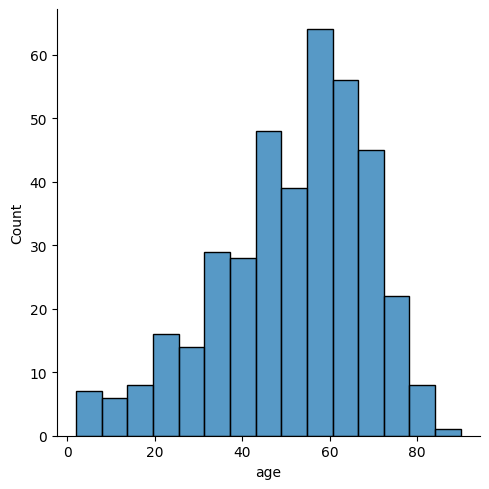

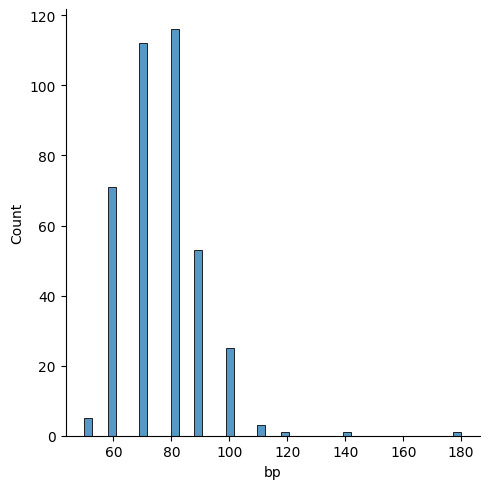

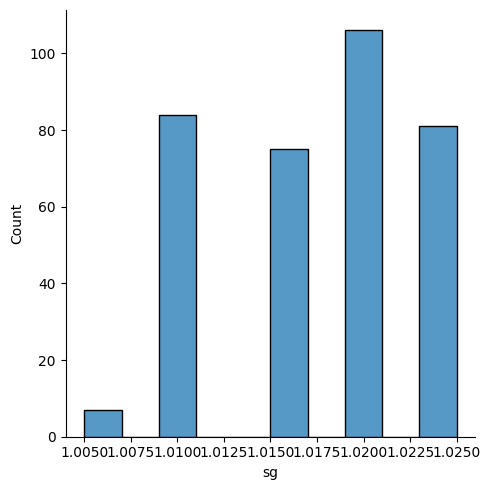

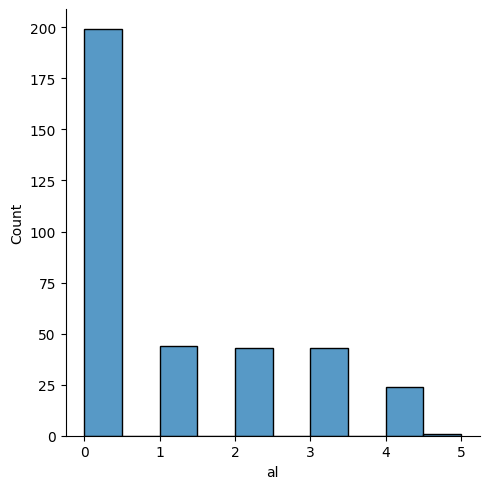

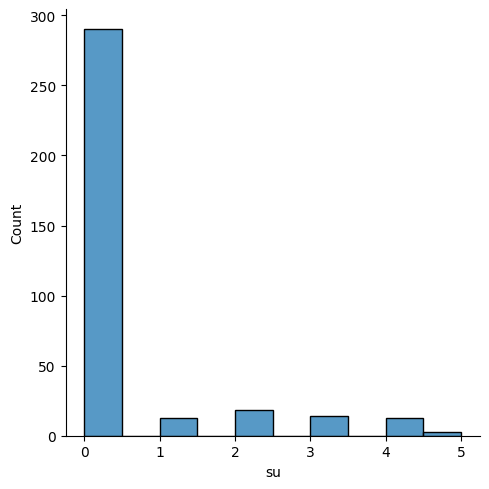

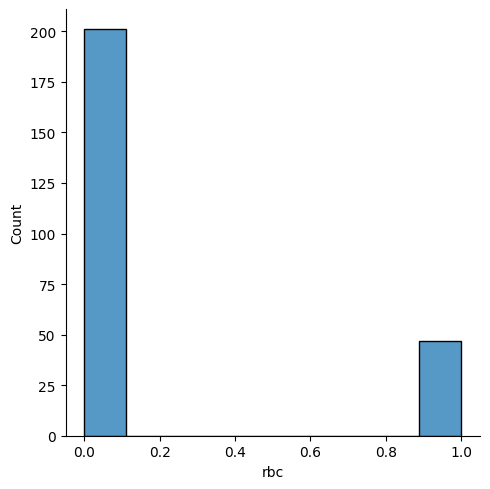

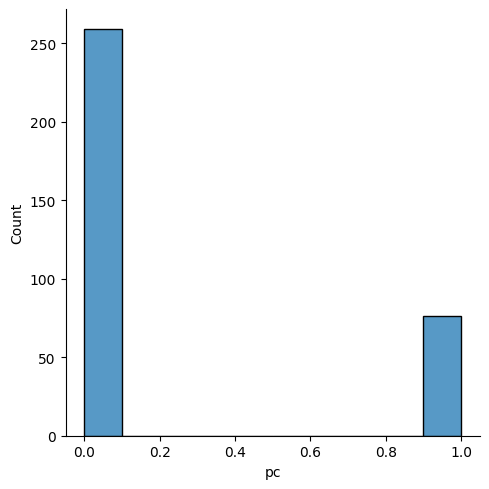

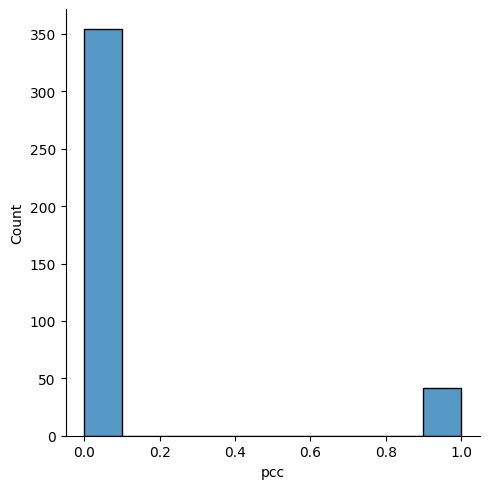

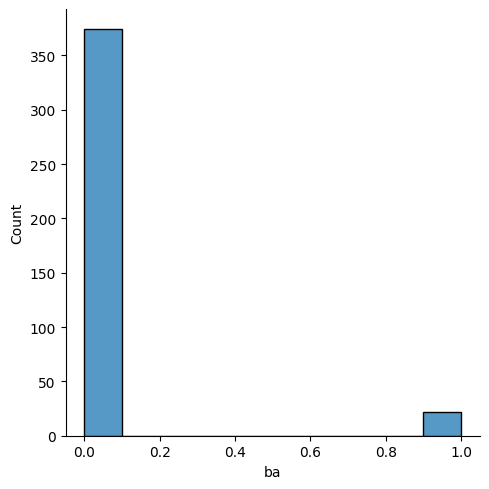

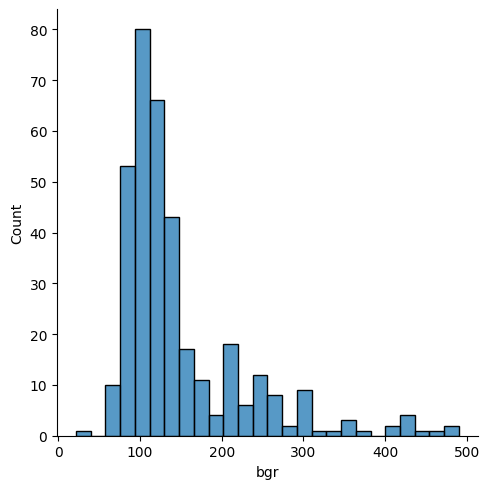

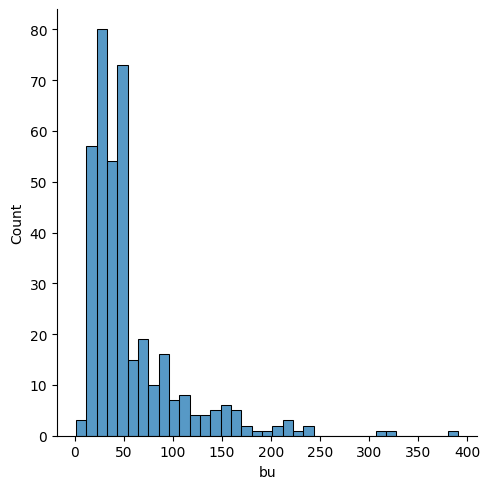

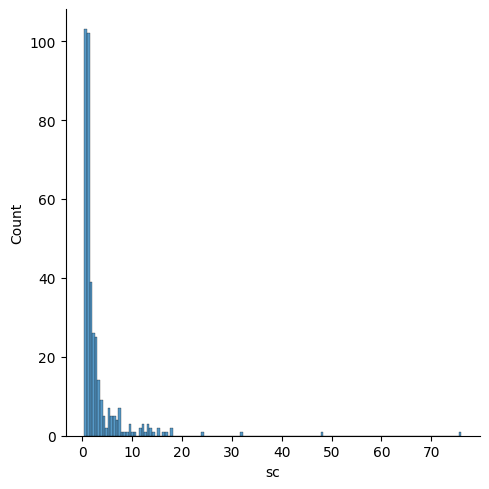

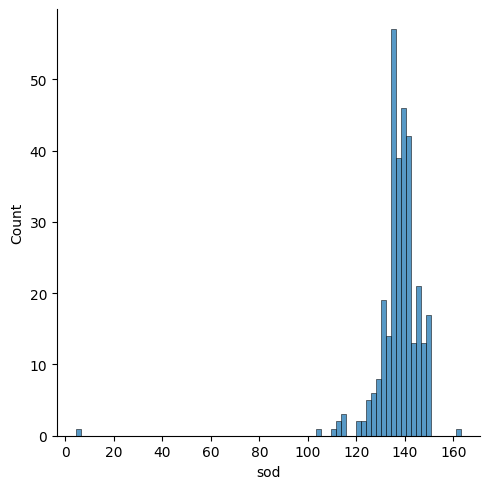

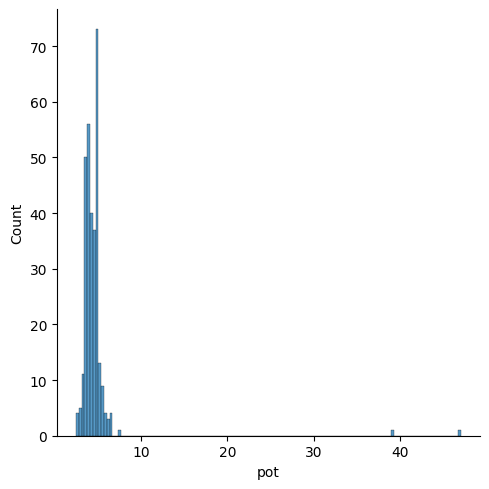

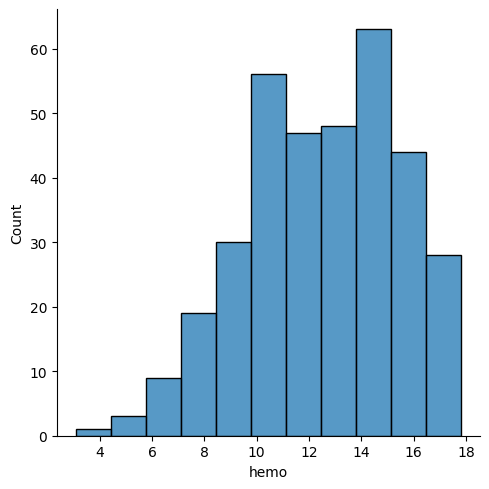

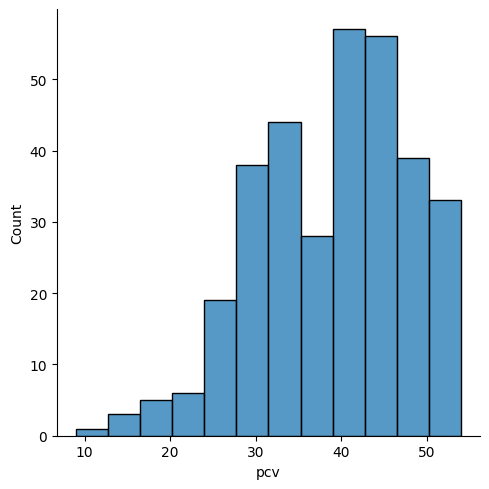

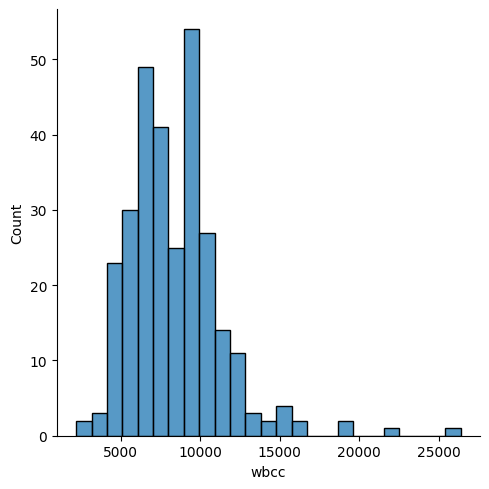

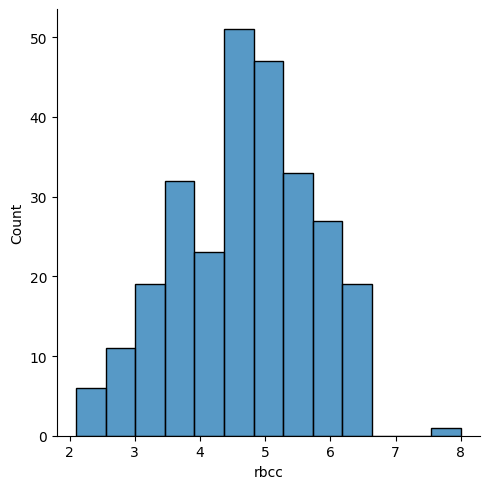

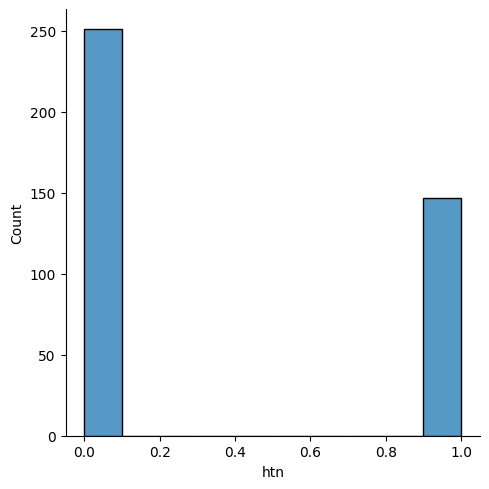

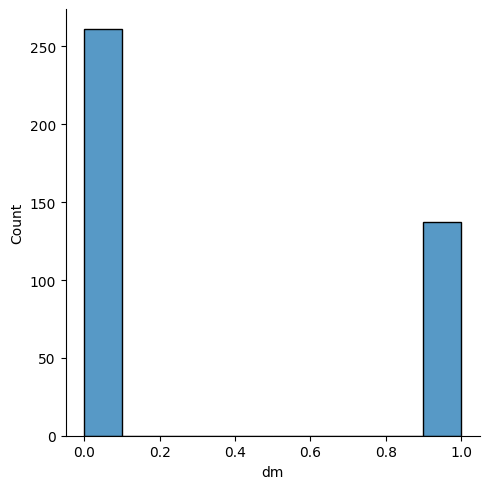

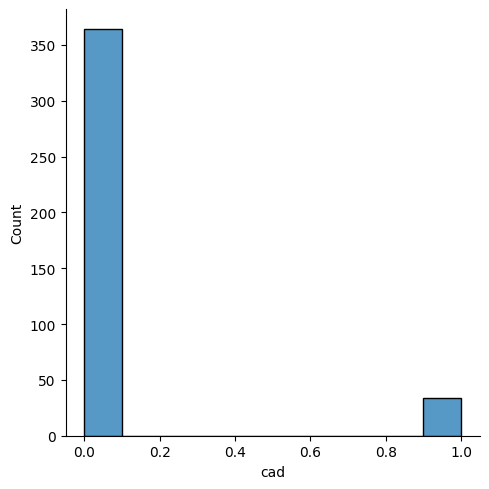

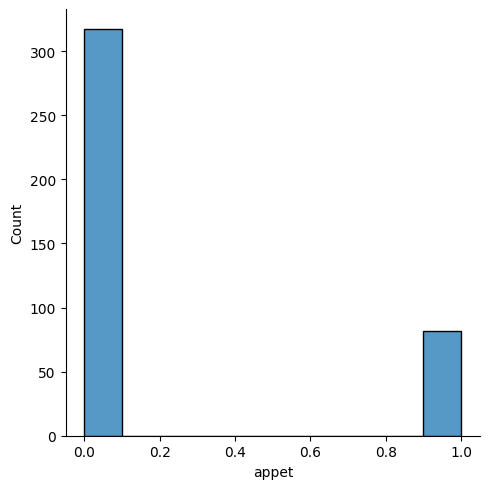

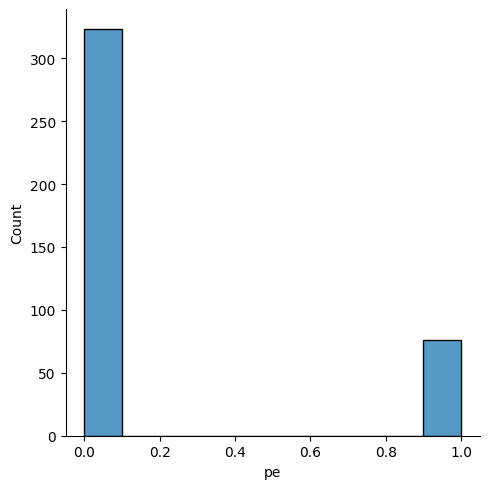

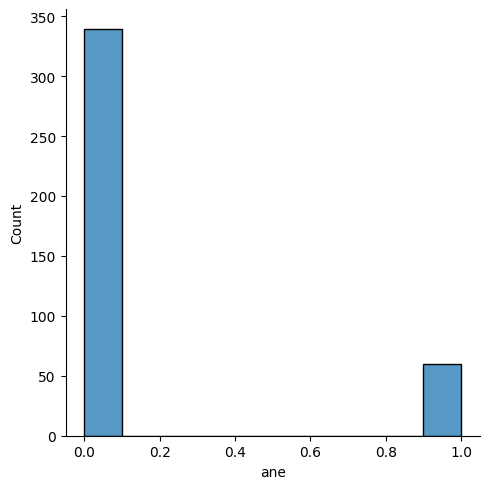

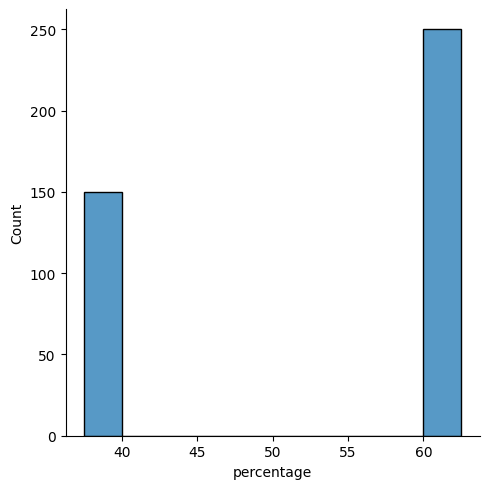

In [695]:
# Antaa kaikkien muuttujien jakaumat

def distplots(column_name):
    sns.displot(kd[column_name])
    plt.show()

for column in kd.select_dtypes(include=["float"]).columns:
    distplots(column)



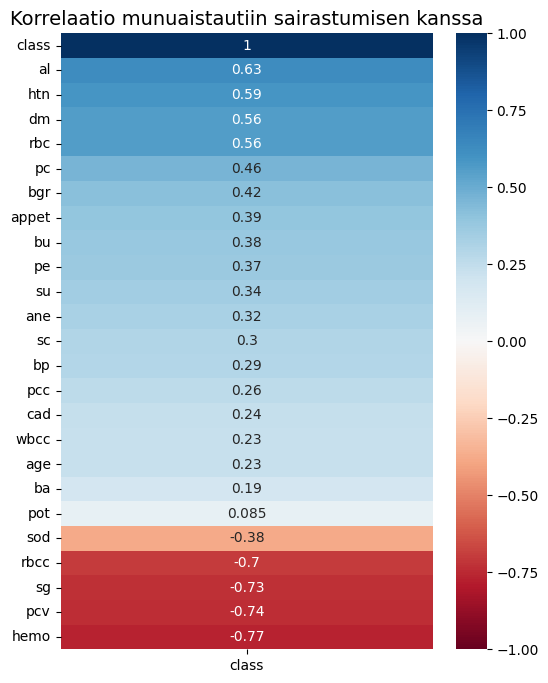

In [696]:
# Otetaan vain korrelaatiot suhteessa class-muuttujaan eli vastemuuttujaan sairastuminen
class_corr = korrelaatiomatriisi[["class"]].sort_values(by="class", ascending=False)

# Tehdään tästä visualisointi, heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(class_corr, vmin=-1.0, vmax=1.0, cmap='RdBu', annot=True, cbar=True)

# Add a title
plt.title('Korrelaatio munuaistautiin sairastumisen kanssa', fontsize=14)
plt.show()

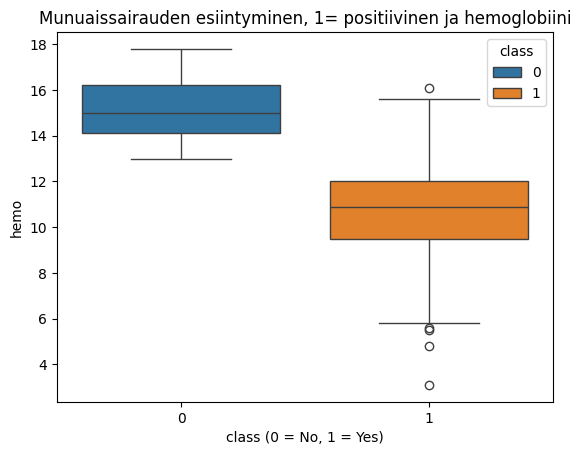

In [697]:
# Potentiaalisia selittäviä muuttujia ovat ( rbcc, sg, pcv, hemo, sod ) ja (al, htn dm, rbs)
# rbcc = red blood cell count, sg =specific gravity , pcv =packed cell volume, hemo= hemoglobin, sod=sodium  /  al=albumin, htn =hypertension dm=diabetes, rbc=red blood cells
# Tarkastellaan erikseen esimerkkinä hemoglobiini

sns.boxplot(x="class", y="hemo", data=kd, hue="class")

# Add labels
plt.title('Munuaissairauden esiintyminen, 1= positiivinen ja hemoglobiini')
plt.xlabel('class (0 = No, 1 = Yes)')
plt.ylabel('hemo')

plt.show()


### Pika-analyysin tulokset:
##### Suurin osa aineistosta (62,5 %) on positiivisa eli sairastuu tautiin
##### Potentiaalisia selittäviä muuttujia ovat seuraavat:
##### rbcc = red blood cell count, sg =specific gravity , pcv =packed cell volume, hemo= hemoglobin, sod=sodium  /  al=albumin, htn =hypertension dm=diabetes, rbc=red blood cells

In [698]:
kd = kd.drop(["percentage"], axis=1)
kd.head()
kd.to_csv("kd_cleaned.csv")